# 詳解 確率ロボティクス 2.4 条件付き確率

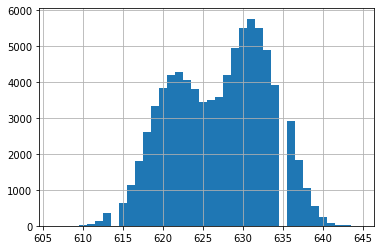

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

data  = pd.read_csv("sensor_data_600.txt", delimiter=" ", 
                    header=None, names = ("date","time","ir","lidar"))

data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]),align='left')
plt.show()

二つの値が欠けるのは，センサ内部でディジタル処理をする様々なセンサで起こりうること．

- マルチモーダル（多峰性）：ピークが2個以上ある分布

c.f. モードが二つの分布は特にバイモーダルと呼ばれる．
モード（最頻値：統計用語）

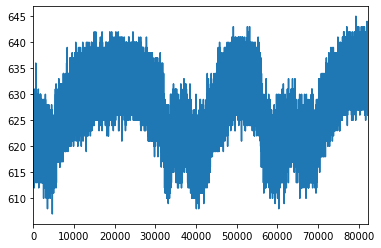

In [2]:
data.lidar.plot()
plt.show()

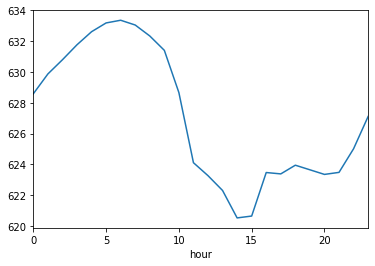

In [3]:
data["hour"] = [e//10000 for e in data.time]  ###hourly_mean###
d = data.groupby("hour")
d.lidar.mean().plot()
plt.show()

1行目：データフレームに hour という列を追加．値は時刻（時分秒の6桁）を10000で割ったもの（時の部分だけを残している）．
//は小数点以下を切り捨てる割り算．

2行目：hour 列の値ごとに各レコードをグループ分けした新たなデータフレーム d を生成している．

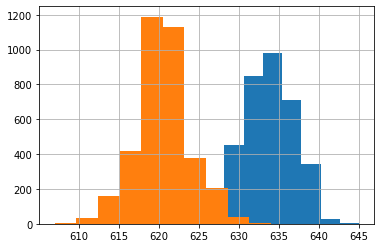

In [4]:
d.lidar.get_group(6).hist()
d.lidar.get_group(14).hist()
plt.show()

ある変数$x$で条件づけられる別の変数$y$の確率分布は
<div style="text-align: center;">
$P(y|x)$
</div>
と表現される（条件付き確率）．

$P(z|t)$において，時刻$t$が分布を変えている直接の原因を表しているわけではない（条件付き確率は変数間の直接の因果を表すものではない）．